# MEMPOOL PREDICTION

# IMPORTING THE LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline


# LOADING THE DATASET

In [132]:
data=pd.read_csv('mempool.csv')

In [133]:
data.head()

,tx_id,fee,weight,parents
0,2e3da8fbc1eaca8ed9b7c2db9e6545d8ccac3c67deadee...,452,1620,NaN
1,79c51c9d4124c5cbb37a85263748dcf44e182dff83561f...,682,1136,6eb38fad135e38a93cb47a15a5f953cbc0563fd84bf1ab...
2,b0ef627c8dc2a706475d33d7712209ec779f7a8302aaea...,226,900,NaN
3,8c25f9be93990b96e8bc363778d6debee6867c7d73cefa...,258,1032,NaN
4,edc82751537be6afcb21c0229d8d20916d8e742a363ab2...,452,1616,NaN


In [5]:
data.columns

Index(['tx_id', 'fee', 'weight', 'parents '], dtype='object')

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5214 entries, 0 to 5213
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tx_id     5214 non-null   object
 1   fee       5214 non-null   int64 
 2   weight    5214 non-null   int64 
 3   parents   2000 non-null   object
dtypes: int64(2), object(2)
memory usage: 163.1+ KB


In [137]:
data.describe()

,fee,weight
count,5214.000000,5214.000000
mean,1435.671461,2000.690449
std,5687.415106,7013.491561
min,110.000000,440.000000
25%,336.000000,888.000000
50%,592.500000,1132.000000
75%,1008.000000,1136.000000
max,201700.000000,295164.000000


In [6]:
data.sort_values('tx_id',ascending=False)

,tx_id,fee,weight,parents
194,fff410035912d1be6f3032151ed5529110276c709d9b9a...,516,1032,NaN
3202,ffea7a0e8ed92ae7f981965cbe6cc6e3a4ab2a9860f4b2...,1057,1132,52017f691b532373c78118eeeea04d56e54da238f1e5c4...
906,ffd7ebe7c403c8b2cb3f009a7119a7b0a2d08f34aa7a88...,444,1132,25dc6644e9f2d3761ef5f1bd0967b2bab9117f4323344d...
3878,ffd4ac2c4cfd215b6b0621a0f2ca4a9f30b50030979245...,235,936,NaN
458,ffd3d5c470bb60b1484505528b160b4ff7b2553a908dcb...,119,444,NaN
...,...,...,...,...
1209,0020b1c90b878d22a07273d1b15c63805d8ed8112f3b69...,134,536,NaN
3095,001eea6dae0bd5568542be629f5748cac3b5b52b24f166...,441,1136,ea45213fcd2089bda8d3a903ca59ebb5ded08f71ae6491...
4869,00119544dd3825a752f8c8c121df4c8f7b63e68830ddcd...,372,664,9867c49df9c7c3798aad36353aa31640dcbad3dd310bb6...
869,000a9de3796bdfb987fb2ccb0f97e11a9dd8f3c70dab34...,301,1024,NaN


In [7]:
data.tx_id.unique()

array(['2e3da8fbc1eaca8ed9b7c2db9e6545d8ccac3c67deadee95db050e41c1eedfc0',
       '79c51c9d4124c5cbb37a85263748dcf44e182dff83561fa3087f0e9e43f41c33',
       'b0ef627c8dc2a706475d33d7712209ec779f7a8302aaeab86c64cf00316a3df8',
       ...,
       '88a8c7118ac82199523eb10670f49c8b7f5ac82d4049072c29f8ee7082d23f9a',
       '4c5b18c0870665958fc2a377e425b70f8d01f03395af722b949955248f42ff0b',
       '631dee801c00241fc61bccc56112cf7670ce7150f4c64235e1c2b888d99a7037'],
      dtype=object)

In [8]:
data.value_counts()

tx_id                                                             fee   weight  parents                                                         
00119544dd3825a752f8c8c121df4c8f7b63e68830ddcdaf92afd0b9c08bc645  372   664     9867c49df9c7c3798aad36353aa31640dcbad3dd310bb604fa2cff431657b80a    1
a6cff4c22851a12047a91d530924b6d3e927586f77d7bd16944a17653907d8a6  977   1132    b4f7b8e5ad15ecf8789ce165da23fc25803e672e19f49fb70ad6f4df27635838    1
a804a3a70c795740b35e40980ad74272ae58cb3f3b21a831353a241199feef7a  301   1136    6eb38cee77cd4177e92c812987d0cc94af5bf39fb781ff384be9f7398786a1e4    1
a7eda4ba9d0c391396281786a430f4708584d53ad819d68c49c8685a147a4067  1101  904     60c7a1e3aa28d7db5360fd9dc8baaa473e3dfc4072c0559d7190a0ca47f1fead    1
a7e5eb1e6bc4e628ae715d812c4f4e9a0ade9f24231b75e4efd7be13f36a09f1  855   1132    72211ae8d68d2c81f8abcb77ecfeac1ca8494ec6c4bf9f73c1a1e50501ea7287    1
                                                                                                         

In [10]:
data.isnull().sum()

tx_id          0
fee            0
weight         0
parents     3214
dtype: int64

In [11]:
data.dtypes

tx_id       object
fee          int64
weight       int64
parents     object
dtype: object

In [12]:
data.isnull().any()

tx_id       False
fee         False
weight      False
parents      True
dtype: bool

In [13]:
data.drop(columns='tx_id')

,fee,weight,parents
0,452,1620,NaN
1,682,1136,6eb38fad135e38a93cb47a15a5f953cbc0563fd84bf1ab...
2,226,900,NaN
3,258,1032,NaN
4,452,1616,NaN
...,...,...,...
5209,850,568,NaN
5210,1496,1488,NaN
5211,1121,900,33c7c7bcb1cc07743fc3240cac6af31e4d4a8f535cae71...
5212,862,576,NaN


In [14]:
data.drop(columns='fee')

,tx_id,weight,parents
0,2e3da8fbc1eaca8ed9b7c2db9e6545d8ccac3c67deadee...,1620,NaN
1,79c51c9d4124c5cbb37a85263748dcf44e182dff83561f...,1136,6eb38fad135e38a93cb47a15a5f953cbc0563fd84bf1ab...
2,b0ef627c8dc2a706475d33d7712209ec779f7a8302aaea...,900,NaN
3,8c25f9be93990b96e8bc363778d6debee6867c7d73cefa...,1032,NaN
4,edc82751537be6afcb21c0229d8d20916d8e742a363ab2...,1616,NaN
...,...,...,...
5209,e0b5d2fe598fccdd716df743323346da227dfc9d2a6c3e...,568,NaN
5210,e33973618a9774aeb85548368efeaddb206ef206717e72...,1488,NaN
5211,88a8c7118ac82199523eb10670f49c8b7f5ac82d404907...,900,33c7c7bcb1cc07743fc3240cac6af31e4d4a8f535cae71...
5212,4c5b18c0870665958fc2a377e425b70f8d01f03395af72...,576,NaN


In [15]:
data.shape

(5214, 4)

In [16]:
data.corr()

,fee,weight
fee,1.000000,0.320535
weight,0.320535,1.000000


# Exploratory Data Analysis
**HISTOGRAM**

**A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.**



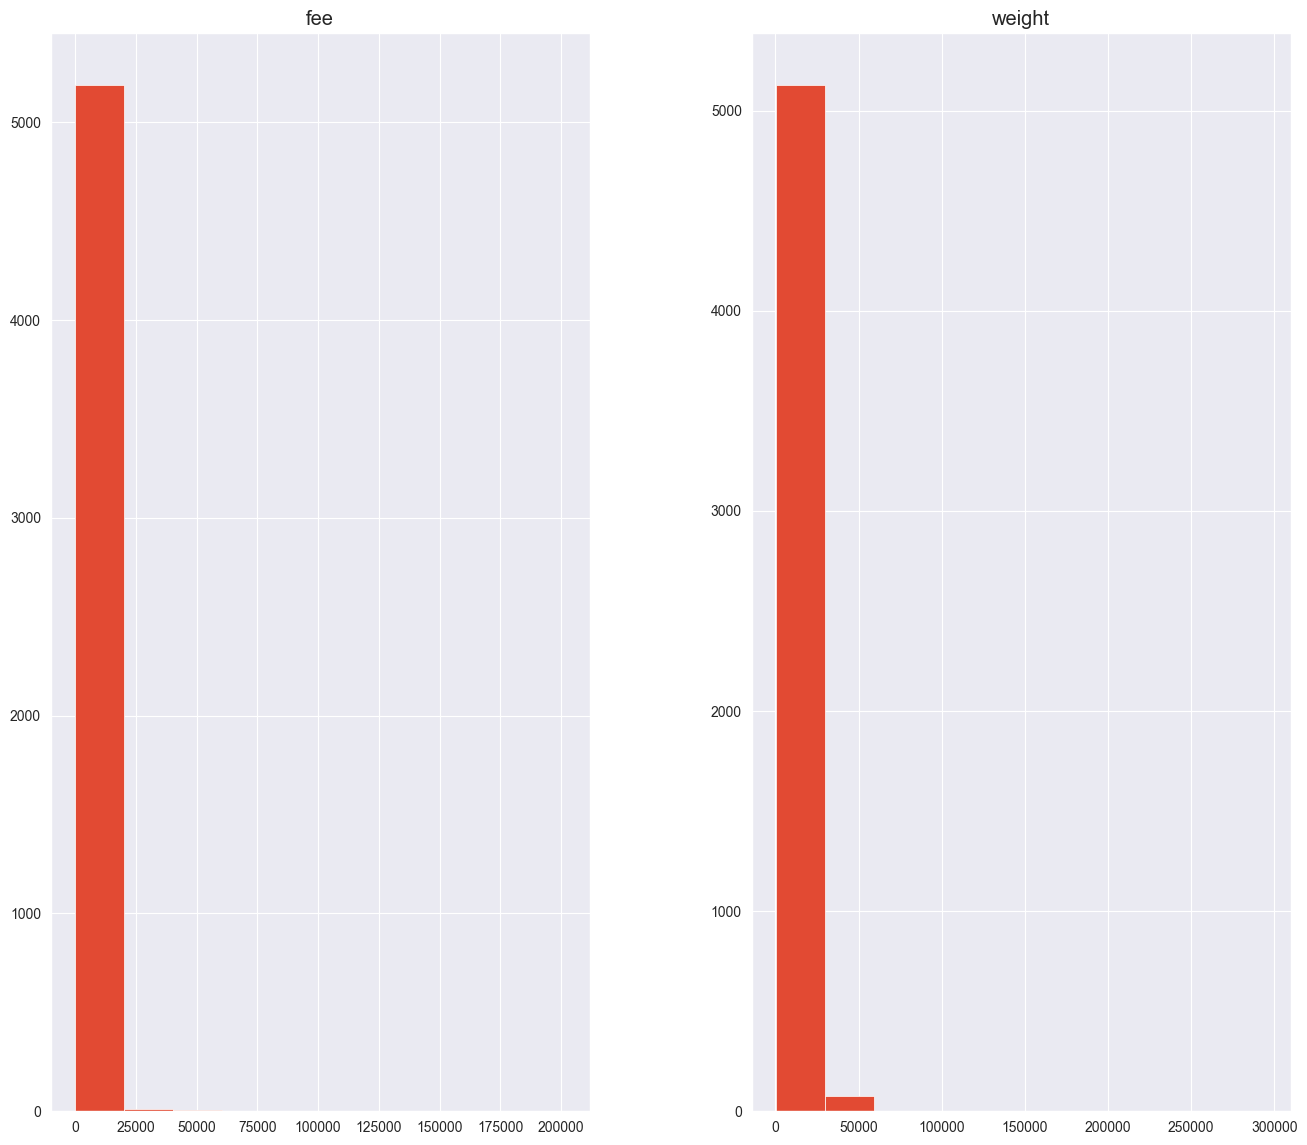

In [76]:
data.hist(figsize=(16,14))
plt.show()


**HEATMAP**

**A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. Heatmaps are used in various forms of analytics but are most commonly used to show user behaviour on specific webpages or webpage templates.**



<AxesSubplot:>

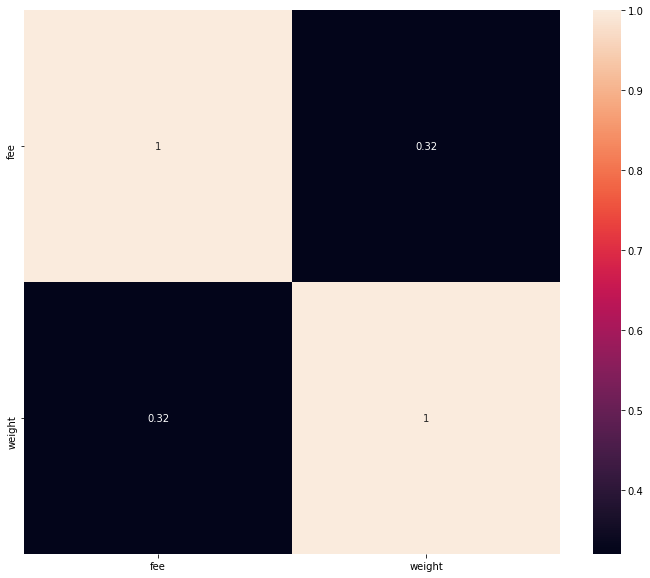

In [20]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)


**PAIRPLOT**

**A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.**

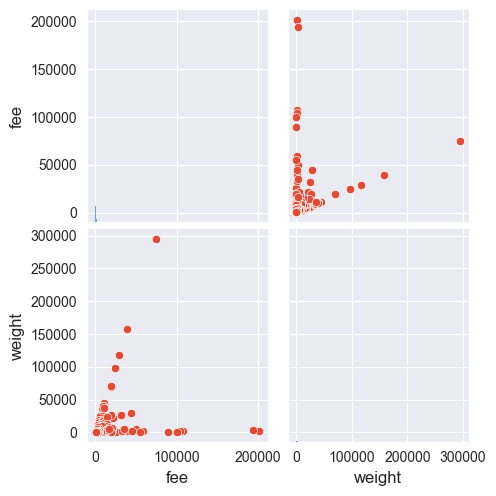

In [73]:
sns.pairplot(data=data)


In [22]:
data.columns


Index(['tx_id', 'fee', 'weight', 'parents '], dtype='object')

**BOXPLOT**

**A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.**



<AxesSubplot:xlabel='fee'>

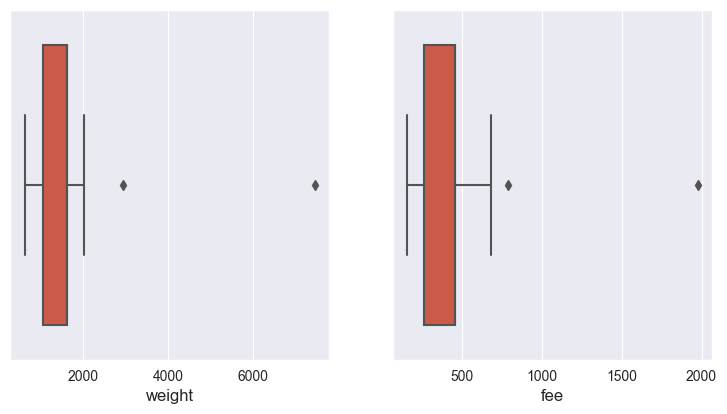

In [72]:
plt.figure(figsize=(14,10))
sns.set_style(style='darkgrid')
plt.subplot(2,3,1)
sns.boxplot(x='weight',data=data[100:180])
plt.subplot(2,3,2)
sns.boxplot(x='fee',data=data[100:180])



**BARPLOT**

**A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.**



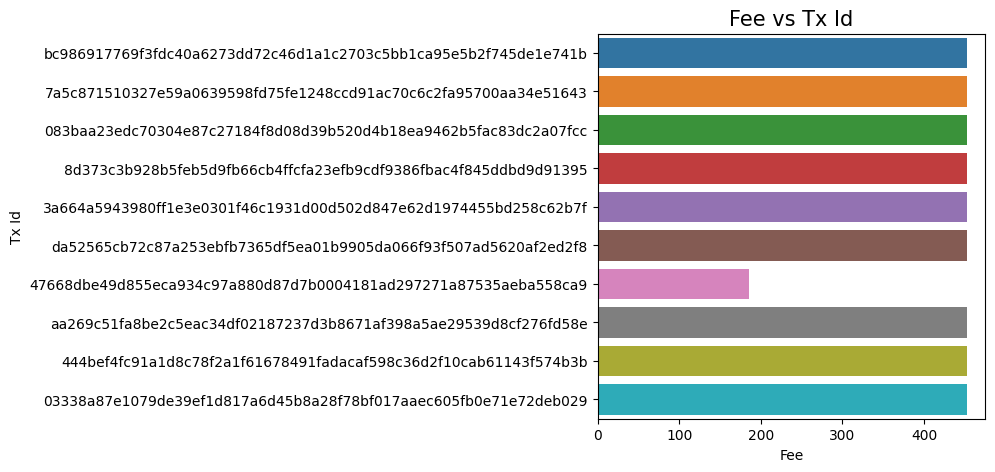

In [77]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="fee", y="tx_id", data=data[170:180])
plt.title("Fee vs Tx Id",fontsize=15)
plt.xlabel("Fee")
plt.ylabel("Tx Id")
plt.show()


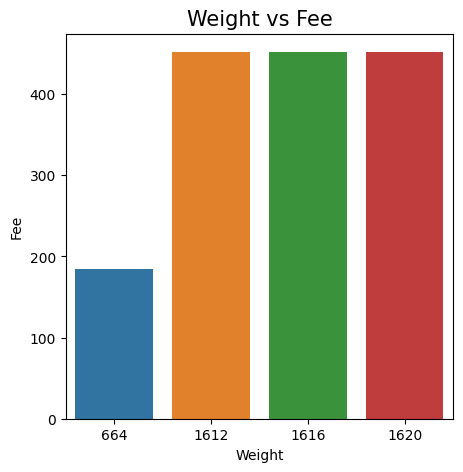

In [78]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="weight", y="fee", data=data[170:180])
plt.title("Weight vs Fee",fontsize=15)
plt.xlabel("Weight")
plt.ylabel("Fee")
plt.show()


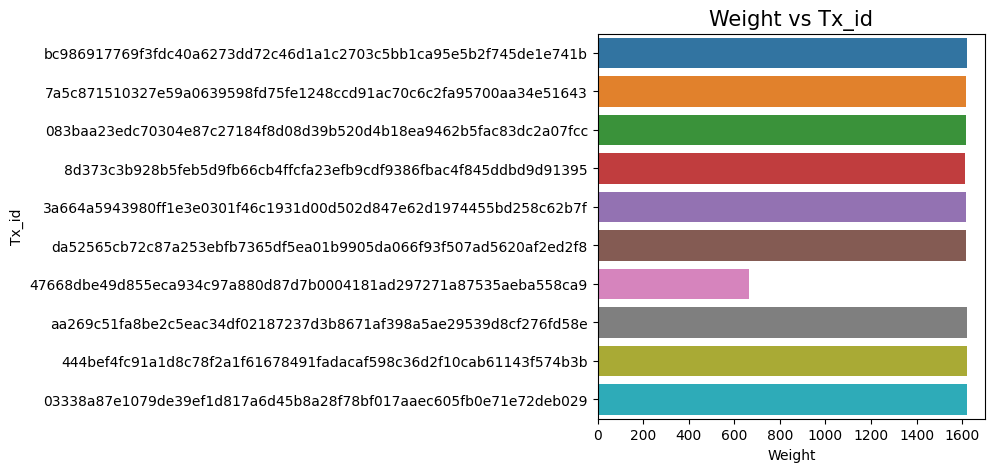

In [79]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="weight", y="tx_id", data=data[170:180])
plt.title("Weight vs Tx_id",fontsize=15)
plt.xlabel("Weight")
plt.ylabel("Tx_id")
plt.show()


**LINEPLOT**

**A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.**



<AxesSubplot:xlabel='weight', ylabel='fee'>

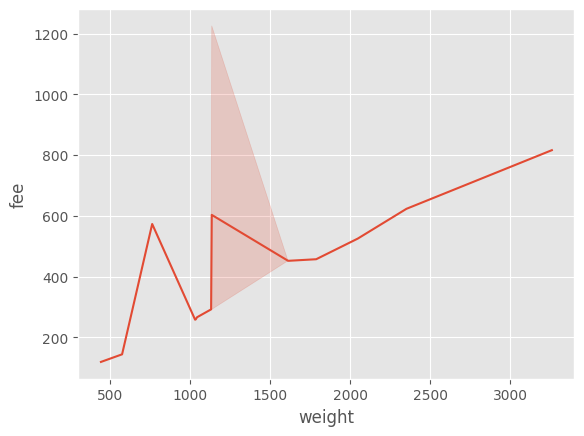

In [44]:

plt.style.use("ggplot")
sns.lineplot(x="weight", y="fee", data=data[40:80])



**VIOLIN PLOT**

**Violin plots are similar to box plots, except that they also show the probability density of the data at different values. These plots include a marker for the median of the data and a box indicating the interquartile range, as in the standard box plots.**


<AxesSubplot:xlabel='fee'>

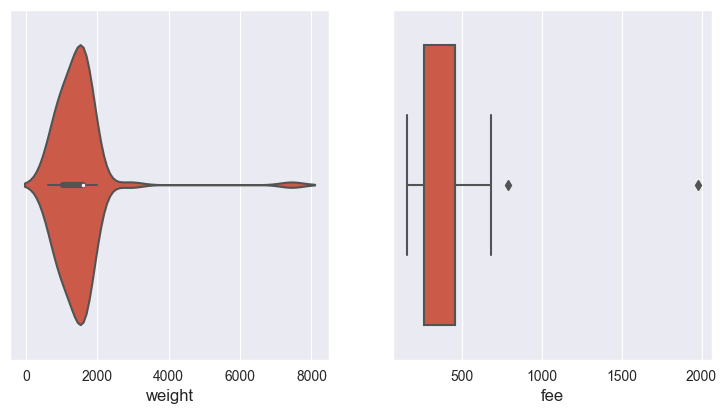

In [70]:
plt.figure(figsize=(14,10))
sns.set_style(style='darkgrid')
plt.subplot(2,3,1)
sns.violinplot(x='weight',data=data[100:180])
plt.subplot(2,3,2)
sns.boxplot(x='fee',data=data[100:180])

**JOINTPLOT**

**Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid.**



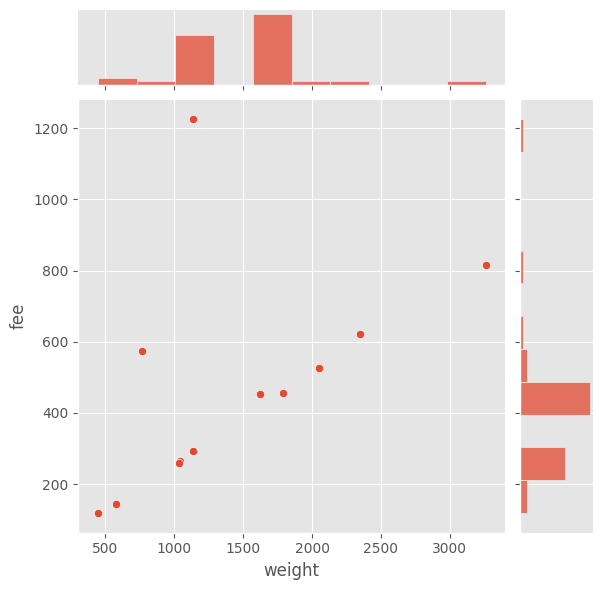

In [52]:
sns.jointplot(x="weight", y="fee", data=data[40:80])

In [84]:
#lets find the categorialfeatures
list_1=list(data.columns)


In [85]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)


In [86]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [87]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])


In [88]:
data

,tx_id,fee,weight,parents
0,981,452,1620,1990
1,2509,682,1136,873
2,3620,226,900,1990
3,2891,258,1032,1990
4,4831,452,1616,1990
...,...,...,...,...
5209,4587,850,568,1990
5210,4634,1496,1488,1990
5211,2802,1121,900,433
5212,1604,862,576,1990


In [107]:
y=data['weight']
x=data.drop('weight',axis=1)


# TRAINING AND TESTING DATA

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)


In [138]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


4171
1043
4171
1043


**MODELS**

**1. KNeighborsClassifier**

**By default, the KNeighborsClassifier looks for the 5 nearest neighbors. We must explicitly tell the classifier to use Euclidean distance for determining the proximity between neighboring points.**



In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [139]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score of Model:\n",knn.score(x_train,y_train)*100)


Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy Score of Model:
 35.81874850155838


**2. DECISION TREE CLASSIFIER**

**Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. ... The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.**



In [115]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [146]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score of Model:\n",dtree.score(x_train,y_train)*100)

Confusion Matrix:
 [[0 0 1 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy Score of Model:
 32.31838887556941


**3.Random Forest Classifier**

**A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.**



In [119]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [147]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score of Model:\n",rfc.score(x_train,y_train)*100)


Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [4 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy Score of Model:
 100.0


**4.Bagging Classifier**

**A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. ... The base estimator to fit on random subsets of the dataset.**



In [145]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.3796740172579099

**5. ExtraTreesClassifier**

**Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result.**



In [127]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)


ExtraTreesClassifier(random_state=0)

In [148]:
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)


Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [2 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Training Score:
 100.0


In [149]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data


,Actual,Predicted
1828,1136,664
4732,576,576
3895,1132,1136
1551,900,896
42,1032,1040
...,...,...
4993,576,896
1262,36524,36520
5192,904,904
3986,760,2672


**CONCLUSION :**

**ACCURACIES OF DIFFERENT MODELS ARE:**

**KNeighbors Classifier= 36 %**

**Decision Tree Classifier= 33 %**

**Random Forest Classifier= 100 %**

**Bagging Classifier = 39 %**

**Extra Trees Classifier= 100 %**

**We got a good accuracy of about 100 % using Random Forest Classifier and Extra Trees Classifier which is quite well for the given dataset.**

**The accuracy of other models can be increased further by HyperTuning.**

**THANK YOU**







